<a href="https://colab.research.google.com/github/monttj/computational-physics/blob/2021/ComPhy-12-GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN Training

In [5]:
from google.colab import drive
drive.mount('/content/drive')

/home/dndus0107/.conda/envs/py39-cuda11.8/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


AttributeError: module 'IPython.utils.traitlets' has no attribute 'Unicode'

In [ ]:
cd /content/drive/My Drive/computational-physics

We will use data from [Quick, Draw! dataset](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap?pli=1).

Please download the camel numpy file and save it into the *`./data/camel/`* folder in this repository.


## imports

In [1]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari


2025-02-12 14:18:29.693088: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-12 14:18:29.748288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
(x_train, y_train) = load_safari(DATA_NAME)

./data/camel/camel.npy


In [4]:
x_train.shape

(80000, 28, 28, 1)

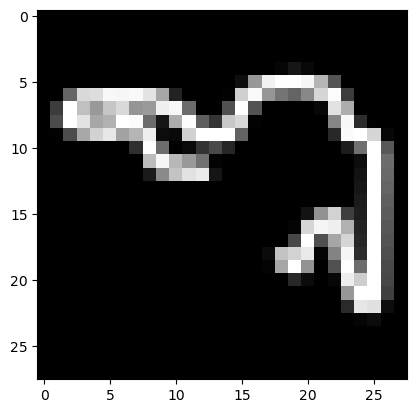

In [5]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

## architecture

In [6]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

2025-02-12 14:18:50.115263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22330 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:12:00.0, compute capability: 8.6
2025-02-12 14:18:50.116825: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22330 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:48:00.0, compute capability: 8.6
2025-02-12 14:18:50.118372: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22330 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:89:00.0, compute capability: 8.6
2025-02-12 14:18:50.120278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22330 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
gan.discriminator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 discriminator_input (Input  [(None, 28, 28, 1)]       0         
 Layer)                                                          
                                                                 
 discriminator_conv_0 (Conv  (None, 14, 14, 64)        1664      
 2D)                                                             
                                                                 
 activation (Activation)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 discriminator_conv_1 (Conv  (None, 7, 7, 64)          102464    
 2D)                                                             
                                                             

In [8]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator_input (InputLaye  [(None, 100)]             0         
 r)                                                              
                                                                 
 dense_1 (Dense)             (None, 3136)              316736    
                                                                 
 batch_normalization (Batch  (None, 3136)              12544     
 Normalization)                                                  
                                                                 
 activation_4 (Activation)   (None, 3136)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 64)        0   

## training

In [9]:
BATCH_SIZE = 64
EPOCHS = 2000
PRINT_EVERY_N_BATCHES = 10

In [10]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

2025-02-12 14:19:00.840442: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-02-12 14:19:00.875900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907


2/2 [==============================] - 1s 3ms/step


2025-02-12 14:19:01.784970: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-02-12 14:19:01.924562: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f088e501f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-02-12 14:19:01.924607: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-02-12 14:19:01.924614: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-02-12 14:19:01.924619: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-02-12 14:19:01.924624: I tensorflow/compiler/xla/service/service.cc:176]   S

0 [D loss: (0.702)(R 0.692, F 0.713)] [D acc: (0.281)(0.562, 0.000)] [G loss: 0.669] [G acc: 1.000]
2/2 [==============================] - 0s 3ms/step


/opt/anaconda3/envs/py39-cuda12.8/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1 [D loss: (0.666)(R 0.603, F 0.730)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.673] [G acc: 1.000]
2/2 [==============================] - 0s 2ms/step
2 [D loss: (0.385)(R 0.074, F 0.695)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.635] [G acc: 1.000]
2/2 [==============================] - 0s 2ms/step
3 [D loss: (0.346)(R 0.000, F 0.693)] [D acc: (0.992)(1.000, 0.984)] [G loss: 0.338] [G acc: 1.000]
2/2 [==============================] - 0s 2ms/step
4 [D loss: (0.376)(R 0.000, F 0.753)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.032] [G acc: 1.000]
2/2 [==============================] - 0s 2ms/step
5 [D loss: (0.388)(R 0.000, F 0.777)] [D acc: (0.586)(1.000, 0.172)] [G loss: 0.254] [G acc: 1.000]
2/2 [==============================] - 0s 2ms/step
6 [D loss: (0.657)(R 0.006, F 1.307)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.693] [G acc: 0.266]
2/2 [==============================] - 0s 2ms/step
7 [D loss: (0.754)(R 0.671, F 0.837)] [D acc: (0.469)(0.922, 0.016)] [G loss: 0.693] [G acc: 0

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()


In [ ]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

In [ ]:
gan.sample_images(RUN_FOLDER)